In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [74]:
session = fastf1.get_session(2023,10,'FP2')
session.load()


core           INFO 	Loading data for British Grand Prix - Practice 2 [v2.3.1]
api            INFO 	Fetching driver list...
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Progr

### Pre defined

In [157]:
compound_color = {'HARD': '#f0f0ec', 
                  'INTERMEDIATE': '#43b02a', 
                  'MEDIUM': '#ffd12e', 
                  'SOFT': '#da291c', 
                  'TEST-UNKNOWN': '#434649', 
                  'UNKNOWN': '#00ffff', 
                  'WET': '#0067ad'}
compound = ['All Compounds','SOFT','MEDIUM','HARD']

### Code Start

In [158]:
laps = session.laps.pick_quicklaps()
max_lap = session.laps["LapNumber"].max()+1
max_lap_time = int(session.laps["LapTime"].dt.total_seconds().max())
drivers = session.drivers
comp = 0

In [159]:
if(comp == 0):
    laps_session = laps[["DriverNumber","Driver","LapNumber","LapStartDate","Compound","LapTime"]]
    laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
    laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.minute
else:
    laps_session = laps.loc[(laps["Compound"] == compound[comp]),["DriverNumber","Driver","LapNumber","LapStartDate","Compound","LapTime"]]
    laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
    laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.minute

C:\Users\GTR\AppData\Local\Temp\ipykernel_6004\1871080469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_session["LapTimeS"] = laps_session["LapTime"].dt.total_seconds()
C:\Users\GTR\AppData\Local\Temp\ipykernel_6004\1871080469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_session["LapStartDateM"] = laps_session["LapStartDate"].dt.minute


In [160]:
max_lap_time = int(laps_session["LapTimeS"].max()+3)
min_lap_time = int(laps_session["LapTimeS"].min()-1)

### Graph Pace Practice

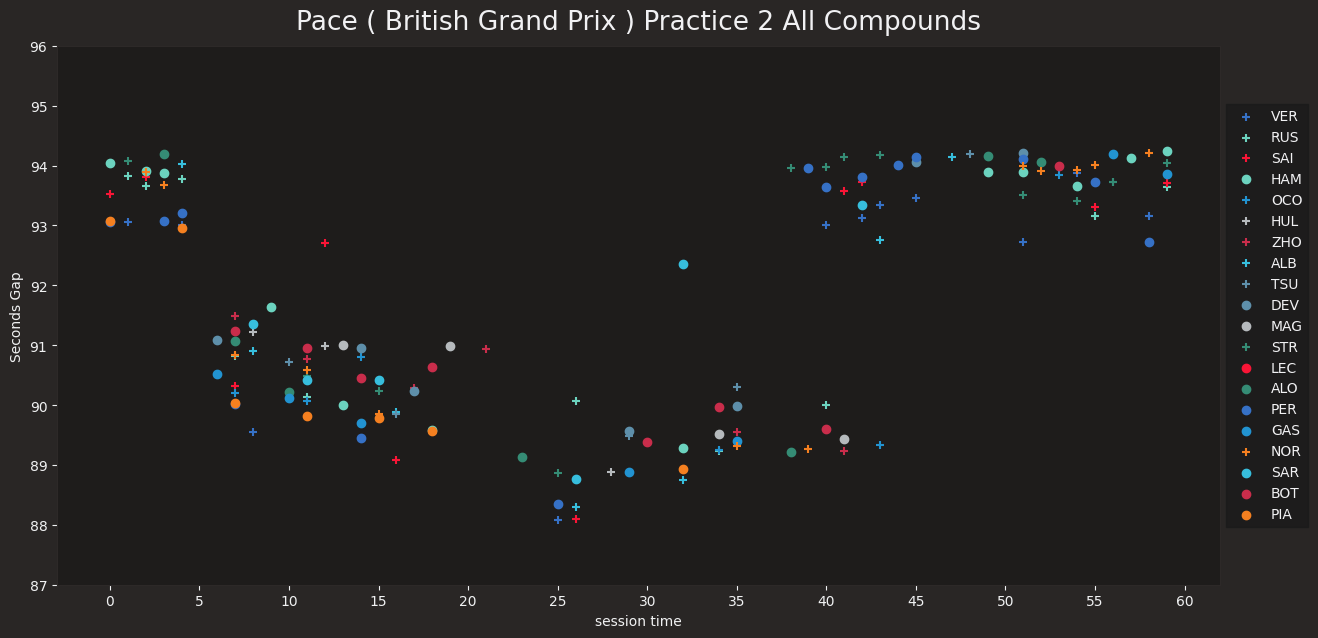

In [162]:
plt.figure(figsize=(15, 7))
color_picked = []
for i in drivers:
    x = laps_session.loc[laps_session["DriverNumber"] == i,"LapStartDateM"]
    y = laps_session.loc[laps_session["DriverNumber"] == i,"LapTimeS"]

    driver_name = session.get_driver(i)["Abbreviation"]
    team_color = session.get_driver(i)["TeamColor"]
    
    if team_color in color_picked:
        plt.scatter(x, y, color="#"+team_color, marker='o', label=driver_name)
    else:    
        plt.scatter(x, y, color="#"+team_color, marker='+', label=driver_name)
        color_picked.append(team_color)

# Customize the plot
plt.title('Pace ( '+session.event["EventName"]+' ) '+session.event["Session2"] +" "+compound[comp])
plt.xlabel('session time')
plt.ylabel('Seconds Gap')
plt.xticks(range(0,65, 5))
plt.yticks(range(min_lap_time, max_lap_time, 1))

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


### Table pace 